# **Day05 of Machine Learning**

## **Charts and Graphs - Data Visualization _...Continuation_** 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import data
from warnings import simplefilter

In [4]:
simplefilter(action='ignore', category=FutureWarning)

#### **8. Box Plot (Box-and-Whisker Plot)**
Box plots summarize the distribution of data by displaying the minimum, first quartile (Q1), median, third quartile (Q3), and maximum values. The "whiskers" extend to the minimum and maximum data points that are not considered outliers, and outliers are shown as individual points. \
They are used for comparing distributions between multiple groups or visualizing the spread, skewness, and outliers of a dataset.

In [6]:
tree = pd.read_csv("datasets/treesR.csv", index_col=0)

[Text(0.5, 1.0, 'Distribution of Girth, Height and Volume')]

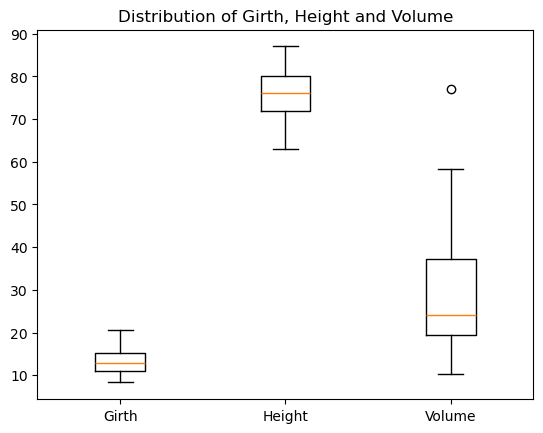

In [7]:
#using matplotlib

fig, ax = plt.subplots()

ax.boxplot(tree, labels=tree.columns)
ax.set(title="Distribution of Girth, Height and Volume")

Text(0.5, 1.0, 'Distribution of total bill on days')

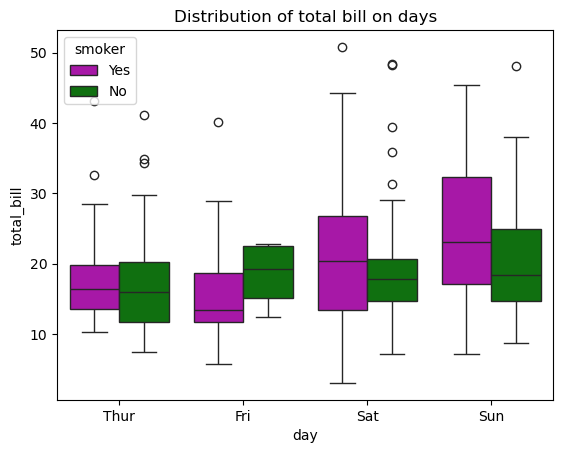

In [8]:
#using seaborn
tips = sns.load_dataset("tips")

sns.boxplot(
    data=tips, 
    x="day",
    y="total_bill",
    hue="smoker",
    palette=['m', 'g']
)
plt.title("Distribution of total bill on days")

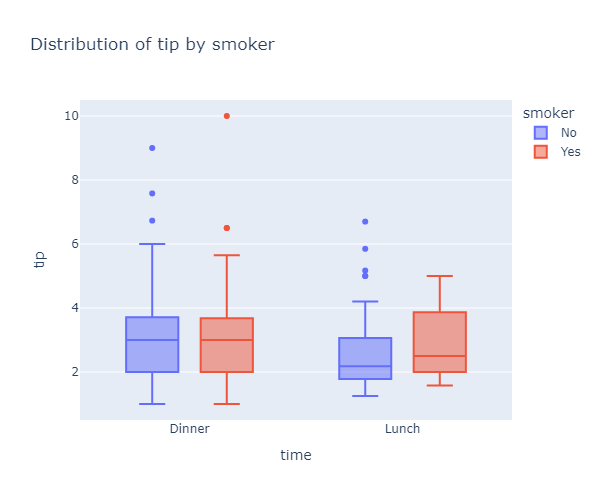

In [9]:
#using plotly

fig = px.box(
    tips,
    x="time",
    y="tip",
    color="smoker",
    title="Distribution of tip by smoker",
    width=600,
    height=500,
)
fig.show(renderer="png")

&nbsp;

#### **9. Kernel Density Estimation (KDE) Plot**
A KDE plot is a smooth, continuous curve that estimates the probability density function of a continuous random variable. Instead of representing data in discrete bins (like in histograms), KDE plots create a smooth curve that shows the distribution of the data over the entire range. \
KDE plots are used to estimate and visualize the probability distribution of a variable, especially when the underlying distribution is unknown or non-parametric. They are used in data exploration to understand the shape, spread, and modality (e.g., unimodal, bimodal) of the data.

In [12]:
from scipy.stats import gaussian_kde

In [13]:
co2 = pd.read_csv("datasets/carbondioxideR.csv", index_col=0)

In [14]:
#calculating kde for conc variable
kde_for_conc = gaussian_kde(co2["conc"])
x_vals = np.linspace(0, 1000, len(co2["conc"]))
kde_conc = kde_for_conc(x_vals)

[Text(0.5, 1.0, 'KDE plot of CO2 concentration')]

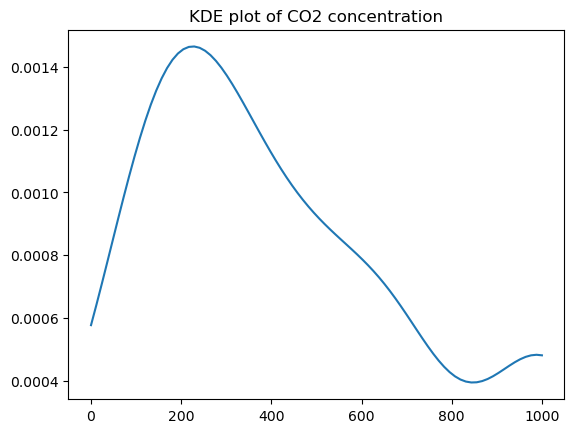

In [15]:
#using matplotlib
fig, ax = plt.subplots()

ax.plot(x_vals, kde_conc)
ax.set(title="KDE plot of CO2 concentration") 

Text(0.5, 1.0, 'KDE plot of uptake by Type')

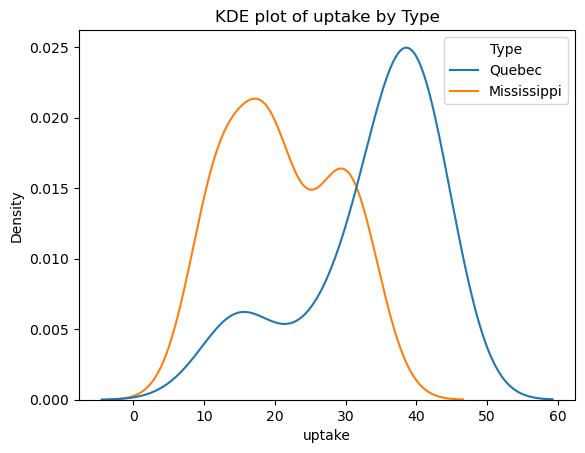

In [16]:
#using seaborn

sns.kdeplot(
    data=co2,
    x="uptake",
    hue="Type",
)
plt.title("KDE plot of uptake by Type")

&nbsp;

#### **10. Hexbin Plot**
A hexbin chart is a 2D plot used to visualize the density of points in a bivariate dataset. It divides the plotting area into hexagonal cells (or bins) and colors each hexagon according to the number of data points within it. This allows for a smoother visual representation of point density compared to scatter plots, especially when the dataset is large.\
Hexbin charts are typically used when you have large datasets with two continuous variables and want to avoid overplotting in scatter plots. It is particularly useful when visualizing the density of two-dimensional data, such as geographic distributions or relationships between two variables.

[Text(0.5, 1.0, 'Hexbin of area and perimeter')]

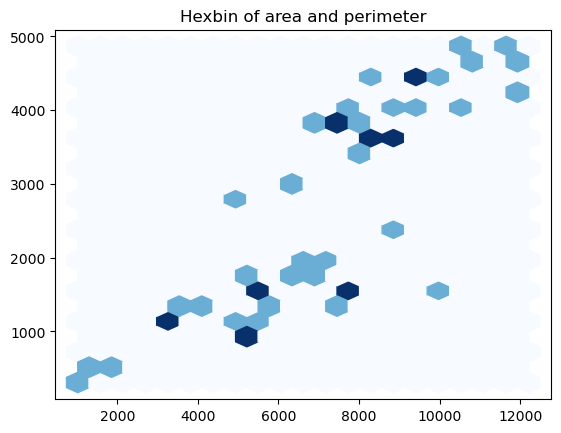

In [19]:
#using matplotlib
rock = pd.read_csv("datasets/rockR.csv", index_col=0)

fig, ax = plt.subplots()

ax.hexbin(x=rock["area"], y=rock["peri"], gridsize=20, cmap="Blues")
ax.set(title="Hexbin of area and perimeter")

Text(0.5, 1.0, 'Distribution of flipper_length and body_mass')

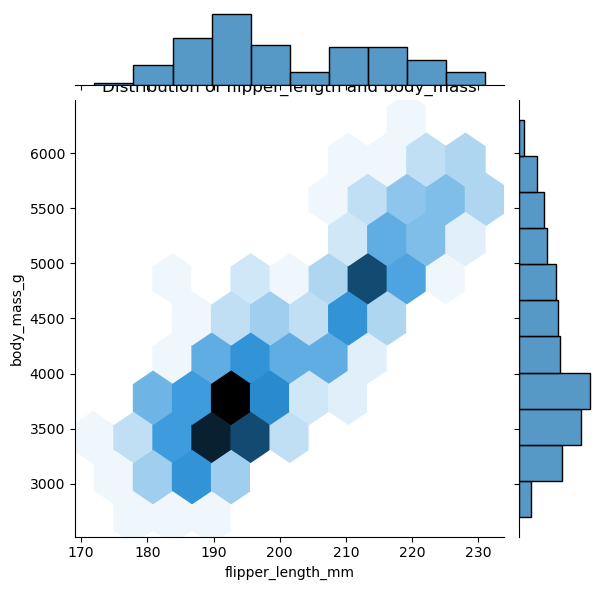

In [20]:
#using seaborn
penguins = sns.load_dataset("penguins")

sns.jointplot(
    data=penguins,
    x="flipper_length_mm",
    y="body_mass_g",
    kind="hex"
)
plt.title("Distribution of flipper_length and body_mass")

&nbsp;

#### **11. Violin Plot**
A combination of a box plot and a kernel density plot, violin plots show the distribution of the data across different groups, providing information about the probability density. It is ideal for comparing the distribution of a continuous variable across multiple categories.

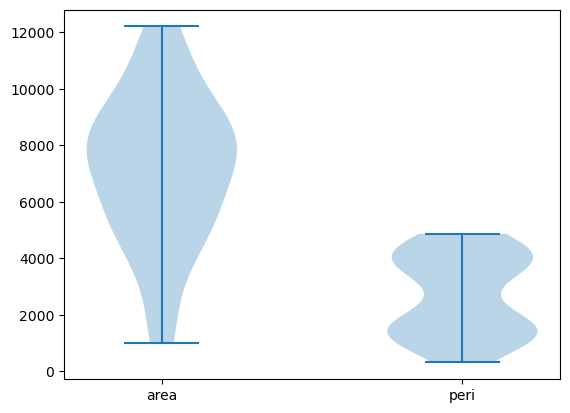

In [23]:
#using matplotlib

fig, ax = plt.subplots()

ax.violinplot(rock[["area", "peri"]])
ax.set_xticks([1,2], labels=["area", "peri"])

<Axes: xlabel='class', ylabel='age'>

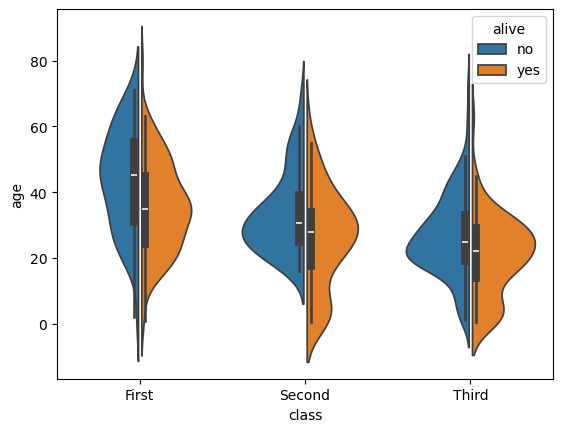

In [24]:
#using seaborn

titanic = sns.load_dataset("titanic")

sns.violinplot(
    data=titanic,
    x="class",
    y="age",
    hue="alive",
    split=True,
    gap=0.05
)

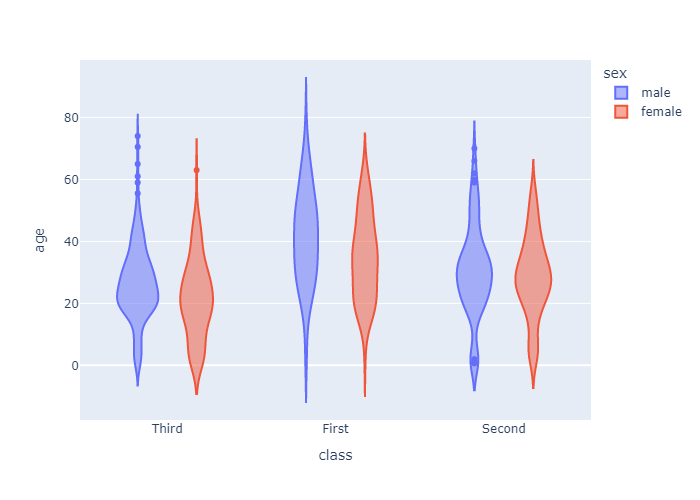

In [25]:
#using plotly

fig = px.violin(
    titanic,
    x="class",
    y="age",
    color="sex",
 )

fig.show(renderer="png")

&nbsp;

#### **12. Heatmap**
A heatmap displays data in a matrix format where each cell is colored according to the value it represents. Darker or lighter colors correspond to higher or lower values, respectively.
Heatmaps are often used for displaying correlation matrices, performance metrics, or any dataset where the relationship between two variables needs to be visually emphasized.

<Axes: xlabel='Task', ylabel='Model'>

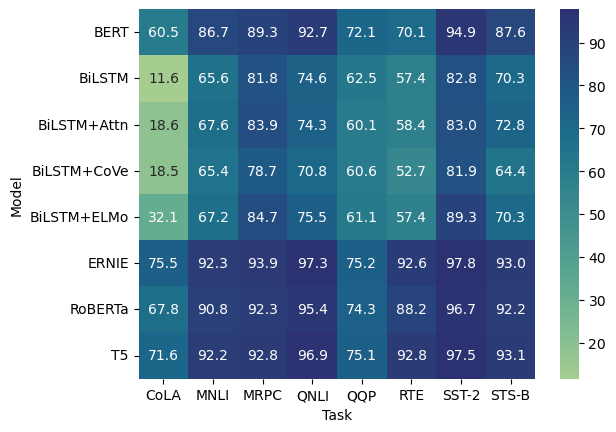

In [28]:
#using seaborn

glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")

sns.heatmap(glue, cmap="crest", annot=True, fmt=".1f")

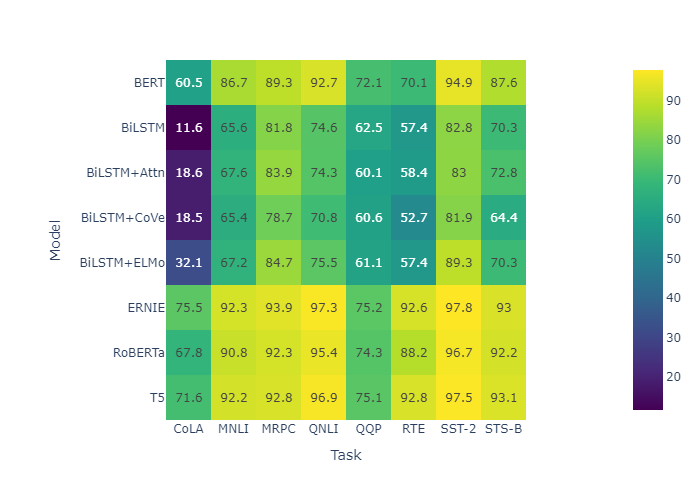

In [29]:
#using plotly

fig = px.imshow(glue, text_auto=True, color_continuous_scale="viridis")
fig.show(renderer="png")

&nbsp;

#### **13. Linear Model Plot (lmplot)**
A linear model plot (lmplot) in visualization shows the relationship between two continuous variables along with a linear regression model fit. It combines scatter plots with a regression line to illustrate both individual data points and the best-fit line through them. \
It is useful for visualizing the linear relationship between two variables and detecting trends, outliers, and deviations from linearity.

In [32]:
iris = sns.load_dataset("iris")

Text(0.5, 1.0, 'Linear Model Plot of sepal_length and petal_length')

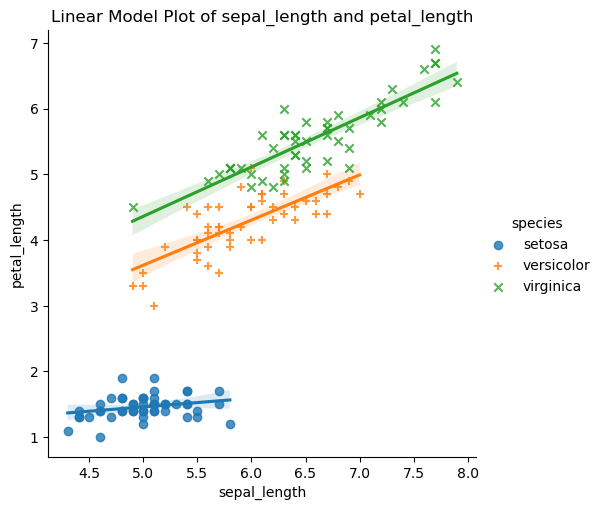

In [33]:
#using seaborn

sns.lmplot(
    iris, 
    x="sepal_length", 
    y="petal_length", 
    hue="species", 
    markers=["o", "+", "x"]
)
plt.title("Linear Model Plot of sepal_length and petal_length")

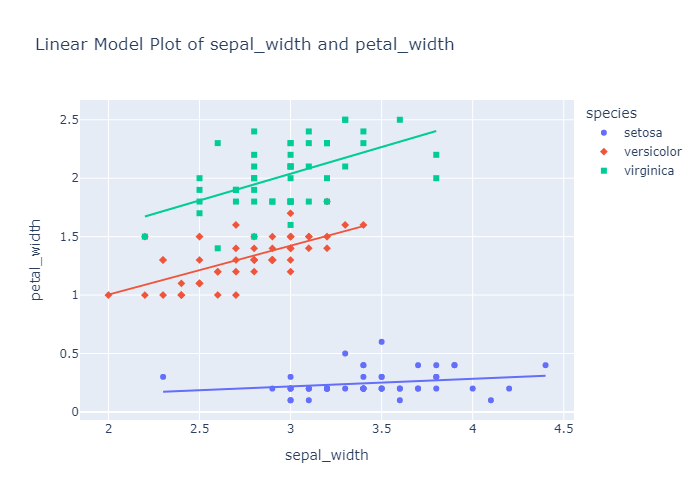

In [34]:
#using plotly

fig = px.scatter(
    iris, 
    x="sepal_width", 
    y="petal_width", 
    color="species", 
    symbol="species", 
    trendline="ols",
    title="Linear Model Plot of sepal_width and petal_width"
)
fig.show(renderer="png")

&nbsp;